Notebook que inicia o pipeline

In [0]:
%run "./00-Casca"

Notebook contendo as variáveis globais do fluxo

In [0]:
%run "./01-Exploração dos Dados"

Chamada da Casca

Notebook contendo as variáveis globais do fluxo

+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|person_age|person_income|person_home_ownership|person_emp_length|loan_intent|loan_grade|loan_amnt|loan_int_rate|loan_status|loan_percent_income|cb_person_default_on_file|cb_person_cred_hist_length|
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|        22|        59000|                 RENT|              123|   PERSONAL|         D|    35000|        16.02|          1|               0.59|                        Y|                         3|
|        21|         9600|                  OWN|                5|  EDUCATION|         B|     1000|        11.14|          0|                0.1|                        N|                         2|
|    

root
 |-- person_age: long (nullable = true)
 |-- person_income: long (nullable = true)
 |-- person_home_ownership: string (nullable = true)
 |-- person_emp_length: long (nullable = true)
 |-- loan_intent: string (nullable = true)
 |-- loan_grade: string (nullable = true)
 |-- loan_amnt: long (nullable = true)
 |-- loan_int_rate: double (nullable = true)
 |-- loan_status: long (nullable = true)
 |-- loan_percent_income: double (nullable = true)
 |-- cb_person_default_on_file: string (nullable = true)
 |-- cb_person_cred_hist_length: long (nullable = true)



32581

summary,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581,32581,32581,31686,32581,32581,32581,29465,32581,32581,32581,32581
mean,27.73459992019889,66074.84846996715,null,4.789686296787225,null,null,9589.371105859243,11.01169489224439,0.21816396059052823,0.17020349283325145,null,5.804211043246064
stddev,6.348078419225366,61983.11916815856,null,4.142630148887856,null,null,6322.086645792363,3.240459464955947,0.4130056685601505,0.10678175634492415,null,4.055001164712731
min,20,4000,MORTGAGE,0,DEBTCONSOLIDATION,A,500,5.42,0,0.0,N,2
max,144,6000000,RENT,123,VENTURE,G,35000,23.22,1,0.83,Y,30


Encontrando valores nulos na base para mapear tratamentos


+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|person_age|person_income|person_home_ownership|person_emp_length|loan_intent|loan_grade|loan_amnt|loan_int_rate|loan_status|loan_percent_income|cb_person_default_on_file|cb_person_cred_hist_length|
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|         0|            0|                    0|              895|          0|         0|        0|         3116|          0|                  0|                        0|                         0|
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+



Buscar outliers extremos na base que impactem o tratamento dos nulos catalogando em uma tabela 

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

Criando tabela com as variáveis estatísticas de Q1, Q3, IQR, limite inferior e superior para análise das variáveis numéricas e encontrar outliers extremos para tratamento.


'default.base_outliers'

Decisões sobre os outliers

1- person_age: Limites estatísticos superior e inferior não atendem a regra de negócio, fazer o cap de outlier extremo em 100 anos, o valor de 144 é irreal para a idade de uma pessoa, indica inconsistência da base de dados

2- person_income: Percentil 99 em US$ 6.000.000,00, indica renda muito alta, mas não demonstra erro ou inconsistência da base, não atuar sobre esta coluna

3- person_emp_length: Percentil 99 de 123 anos, valor irreal para tempo de emprego, fazer cap de outlier extremo para tempo de trabalho em 50 anos

4- loan_amnt: Coluna com valores consistentes, não atuar

5- loan_int_rate: Coluna com valores consistentes, não atuar

6- loan_status: Coluna com valores binários, não atuar

7- loan_percent_income: Coluna com valores consistentes, não atuar

8- cb_person_hist_length: Coluna com valores consistentes, não atuar

In [0]:
%run "./02-Tratamento dos Dados"

Chamada da casca


Notebook contendo as variáveis globais do fluxo

Carga de base bruta

Cap de idade em person_age

Cap de tempo de trabalho em person_emp_length

Completar valores nulos das colunas:

1- person_emp_length: mediana dos dados, dessa forma podemos trazer, após o tratamento dos outliers extremos, a mediana é mais robusta pois é menos sensível aos outliers definidos na exploração dos dados como acima de 14,5. Desta forma trazemos como valor de escape para nulos, um valor que representa um comportamento mais alinhado com os valores entre Q1 e Q3 da métrica, evitando assim que a predição da PD, dentro do contexto de risco de crédito, fique subestimada.

2- loan_int_rate: Variável com melhor distribuição de dados, portanto, a média da taxa de juros é um bom candidato a valor de escape para valores nulos nesta coluna. Lembrando de fazer esta média agrupada pela variável loan_grade (rating da operação)


Há um tratamento pertinente na variável cb_person_default_on_file, cujo os dados são "Y" ou "N", que serão convertidos para valores binários de 0 ou 1


Criar a tabela tratada


In [0]:
%run "./03-Validação dos Dados"

Chamada da Casca


Notebook contendo as variáveis globais do fluxo

Validação dos dados pós tratamento

1- Verificação do tratamento de outliers

2- Verificação dos nulos

3- Verificação das categorias das variáveis não numéricas


Carga da base limpa


Exploração das métricas estatísticas de qualidade


summary,loan_grade,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581,32581,32581,32581,32581,32581,32581,32581,32581,32581,32581,32581
mean,null,27.729136613363618,66074.84846996715,null,4.763512476596789,null,9589.371105859243,11.009816236053181,0.21816396059052823,0.17020349283325145,0.17632976274515821,5.804211043246064
stddev,null,6.268786695714726,61983.11916815856,null,3.996756141825326,null,6322.086645792363,3.219338166162724,0.4130056685601505,0.10678175634492415,0.3811063308194993,4.055001164712731
min,A,20,4000,MORTGAGE,0.0,DEBTCONSOLIDATION,500,5.42,0,0.0,0,2
max,G,100,6000000,RENT,50.0,VENTURE,35000,23.22,1,0.83,1,30


Verificação de nulos

loan_grade,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0,0,0,0,0,0,0,0,0,0,0


Verificar colunas categóricas

Valores distintos de: person_home_ownership


person_home_ownership
RENT
OWN
MORTGAGE
OTHER


Valores distintos de: loan_intent


loan_intent
PERSONAL
EDUCATION
MEDICAL
VENTURE
HOMEIMPROVEMENT
DEBTCONSOLIDATION


Valores distintos de: loan_grade


loan_grade
D
B
C
A
E
F
G


In [0]:
%run "./04-Modelo"

Carga da base tratada na validação

Notebook contendo as variáveis globais do fluxo

1- Conversão da base para Pandas

2- One-hot encoding para variáveis categóricas

3- Separação da base em X e Y (variáveis independentes e variável resposta)

4- Split Treino/Teste

6- Treino do Modelo

Bloco de Métricas de análise estatística do desempenho do Modelo

1- Métrica de AUC (Área sob a curva ROC)

2- Previsão binária e matriz de confusão

3- Relatório de Classificação

4- KS (Kolmogorov-Smirnov)

5- Importância das variáveis na predição (Coeficientes de Regressão Logística)

AUC: 0.8695694601447326
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5095
           1       0.77      0.57      0.65      1422

    accuracy                           0.87      6517
   macro avg       0.83      0.76      0.79      6517
weighted avg       0.86      0.87      0.86      6517

KS: 0.6030482713120195


,variavel,coeficiente
5,loan_percent_income,1.394544
18,loan_grade_D,0.768280
19,loan_grade_E,0.444385
10,person_home_ownership_RENT,0.428040
20,loan_grade_F,0.261092
21,loan_grade_G,0.259734
4,loan_int_rate,0.210193
17,loan_grade_C,0.128402
16,loan_grade_B,0.088835
1,person_income,0.042167


Coletando as métricas definidas em 04-Modelo, cria-se um Dashboard com os gráficos de análise do modelo

Notebook contendo as variáveis globais do fluxo

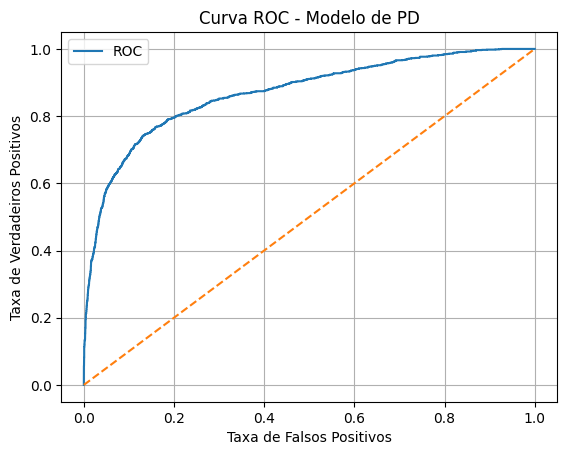

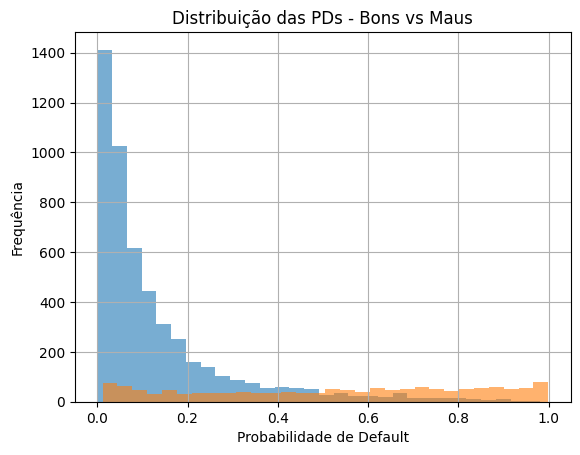

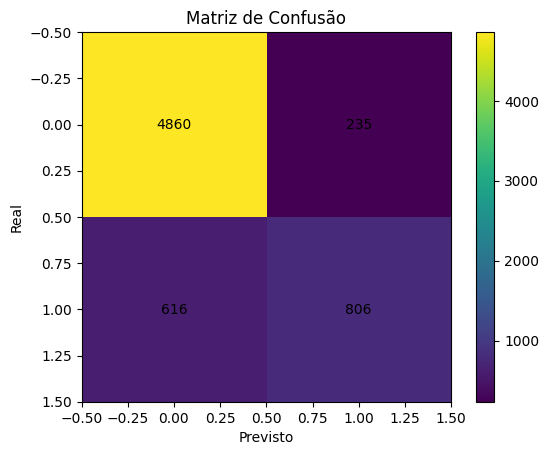

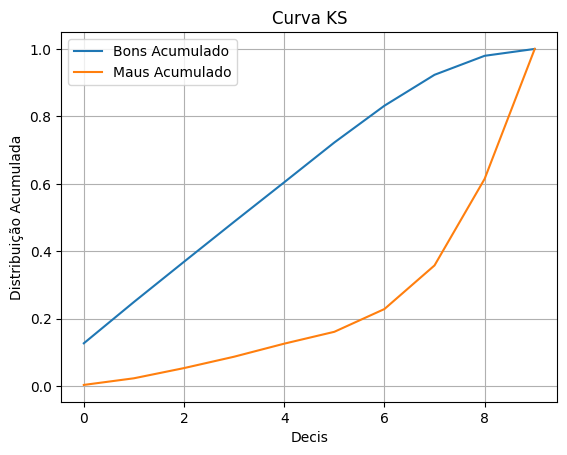

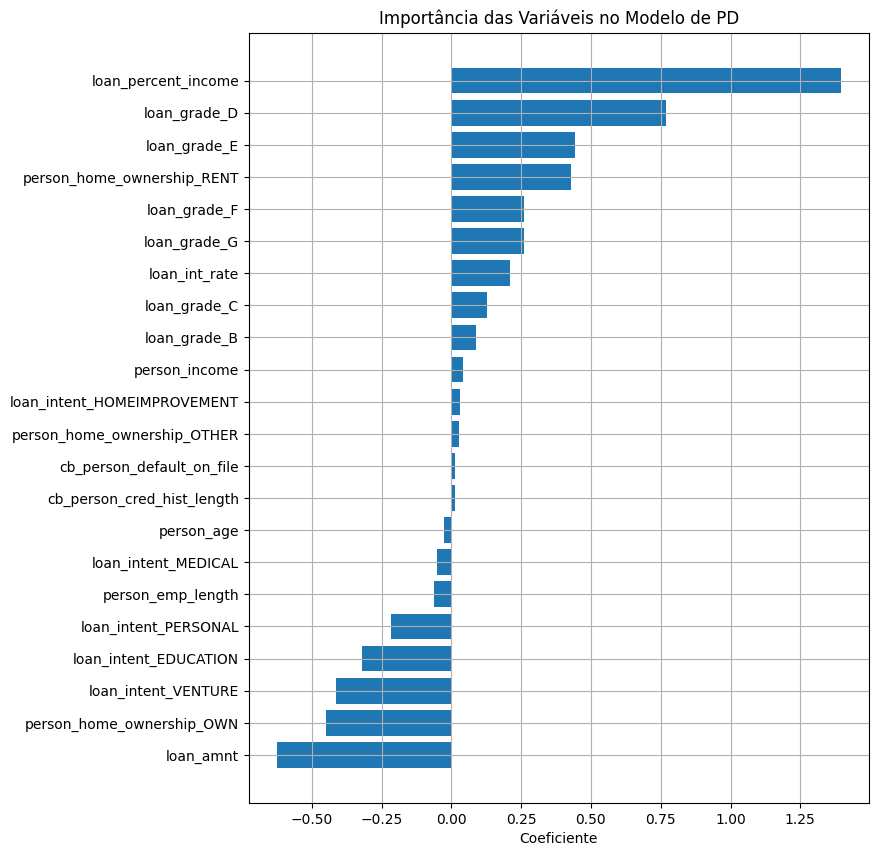

In [0]:
%run "./05-Dashboard"